# Image Stitcher
___
**Fordyce Lab**, **2018**

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pandas as pd

sys.path.insert(0, '/home/eMITOMI/Analysis_Pipelines/common/GithubRepos/ImageStitcher/')
from imagestitcher import stitcher

## FF Corrections

In [3]:
ffParamsPath = '/home/eMITOMI/Support_Data/FF_Correction/FFCorrectionVals.csv'
ffParams = pd.read_csv(ffParamsPath)

ffParams[['FFDate', 'Setup', 'TargetExposure(ms)', 'FFDarkVal', 'FFScale', 'FFImageExposure(ms)']]

,FFDate,Setup,TargetExposure(ms),FFDarkVal,FFScale,FFImageExposure(ms)
0,180324,2,500,-150,16665,2000
1,180324,2,2000,805,15577,2000
2,180401,3,500,201,21663,4000
3,180401,3,2000,2778,19086,4000
4,180324,4,500,226,12950,2000
5,180324,4,2000,0,13176,2000


## Stitching Settings

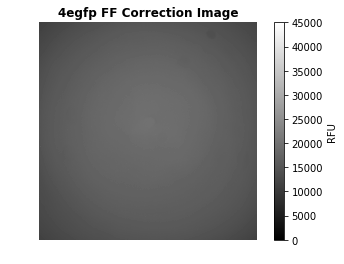

In [4]:
# Setup 4
setup_4_ffPath = '/home/eMITOMI/Support_Data/FF_Correction/Setup4/180324_Setup4_FF_eGFP_2000ms_2x2.tif'
setup_4_ffParams = {'4egfp':{500: (226, 12950), 2000: (0, 13176)}}

# Setup 3
setup_3_ffPath = '/home/eMITOMI/Support_Data/FF_Correction/Setup3/180401_Setup3_FFcorr_eGFP_4s_2x2.tif'
setup_3_ffParams = {'4egfp':{500: (201, 21663), 2000: (2778, 19086)}}

# Setup 2
setup_2_ffPath = '/home/eMITOMI/Support_Data/FF_Correction/Setup2/180324_Setup2_FF_eGFP_2000ms_2x2.tif'
setup_2_ffParams = {'4egfp':{500: (-150, 16665), 2000: (805, 15577)}}

settings = stitcher.StitchingSettings(ffPaths = {'4egfp': setup_2_ffPath},
                                        ffParams = setup_2_ffParams,
                                        setupNum= 2,
                                        tileDim = 1024
                                     )

settings.showFFImages(vmin = 0, vmax = 45000)

## Single Image Stitching

In [6]:
path = '/media/dmokhtari/Atlas-HDD/eMITOMI_Workup/Setup2/180614_NewPipeline/Backgrounds/20180614-160250-d2_Background_3/4egfp/20180614-160250_Background_3_4egfp'

params = stitcher.RasterParams(path, 'ipnb', 0.1, [500, 2000], '4egfp', 2, autoFF = True)
stitcher.stitchImage(path, params)

18-06-17 23:54:02 INFO     Stitching images | Ch: GFP, Exp: [500, 2000], Overlap: 0.1, Rot: 0
18-06-17 23:54:03 INFO     Flat-Field Corrected Image | Ch: GFP, Exp: 500
18-06-17 23:54:06 INFO     Flat-Field Corrected Image | Ch: GFP, Exp: 2000


## Kinetic Images Stitching

In [ ]:
kineticPath = ''

p = stitcher.RasterParams(kineticPath, 'ipnb', 0.1, None, '3dapi', 4, autoFF = False)
stitcher.stitchKinetics(kineticPath, p)

## Multi-Folder Stitching

In [5]:
multiImagePath = '/media/dmokhtari/Atlas-HDD/eMITOMI_Workup/Setup2/180614_NewPipeline/Assays/d1_cMUP/ButtonQuants'

p = stitcher.RasterParams(multiImagePath, 'ipnb', 0.1, 500, '4egfp', 2, autoFF = True)
stitcher.walkAndStitch(multiImagePath, p, stitchtype = 'single')

18-06-18 00:13:55 INFO     Stitching images | Ch: 4egfp, Exp: 500, Overlap: 0.1, Rot: 0
18-06-18 00:13:56 INFO     Flat-Field Corrected Image | Ch: 4egfp, Exp: 500
18-06-18 00:13:56 INFO     Stitching images | Ch: 4egfp, Exp: 500, Overlap: 0.1, Rot: 0
18-06-18 00:13:57 INFO     Flat-Field Corrected Image | Ch: 4egfp, Exp: 500
18-06-18 00:13:57 INFO     Stitching images | Ch: 4egfp, Exp: 500, Overlap: 0.1, Rot: 0
18-06-18 00:13:58 INFO     Flat-Field Corrected Image | Ch: 4egfp, Exp: 500
18-06-18 00:13:58 INFO     Stitching images | Ch: 4egfp, Exp: 500, Overlap: 0.1, Rot: 0
18-06-18 00:13:59 INFO     Flat-Field Corrected Image | Ch: 4egfp, Exp: 500
18-06-18 00:13:59 INFO     Stitching images | Ch: 4egfp, Exp: 500, Overlap: 0.1, Rot: 0
18-06-18 00:14:00 INFO     Flat-Field Corrected Image | Ch: 4egfp, Exp: 500
18-06-18 00:14:00 INFO     Stitching images | Ch: 4egfp, Exp: 500, Overlap: 0.1, Rot: 0
18-06-18 00:14:01 INFO     Flat-Field Corrected Image | Ch: 4egfp, Exp: 500
18-06-18 00:14:0

## BG Subtract

##### Hold the BG Images

In [16]:
bg = stitcher.BackgroundImages()

###### Define Paths

In [17]:
# Reference Background Images
backgroundsRootD1 = '/media/dmokhtari/Atlas-HDD/eMITOMI_Workup/Setup2/180614_NewPipeline/Backgrounds/20180614-154338-d1_Background/4egfp/StitchedImages/StitchedImage_500_GFP_0.tif'
backgroundsRootD2 = '/media/dmokhtari/Atlas-HDD/eMITOMI_Workup/Setup2/180614_NewPipeline/Backgrounds/20180614-160250-d2_Background_3/4egfp/StitchedImages/StitchedImage_500_GFP_0.tif'

##### Add the Images

In [18]:
bg.add(backgroundsRootD1, 'd1', '4egfp', 500)
bg.add(backgroundsRootD2, 'd2', '4egfp', 500)

##### Define Target

In [19]:
# target = '/home/eMITOMI/Analysis_Pipelines/common/ProcessorPack/Testing/180528_S3/Assays/d1_cMUP/Button_Quants/20180529-001827-d1_10uM_cMUP_PreAssay_ButtonQuant/4egfp/StitchedImages/StitchedImg_500_GFP_0.tif'
targetRoot = '/media/dmokhtari/Atlas-HDD/eMITOMI_Workup/Setup2/180614_NewPipeline/Assays/d2_MecMUP/ButtonQuants/'

###### Execute

In [20]:
bg.walkAndBGSubtract(targetRoot, 'd2', '4egfp')

18-06-18 01:01:44 INFO     Background Subtracting | Ch: 4egfp, Ex: 500, Index: d2
18-06-18 01:01:45 INFO     Background Subtracting | Ch: 4egfp, Ex: 500, Index: d2
18-06-18 01:01:46 INFO     Background Subtracting | Ch: 4egfp, Ex: 500, Index: d2
18-06-18 01:01:48 INFO     Background Subtracting | Ch: 4egfp, Ex: 500, Index: d2
